### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import mstats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib

In [4]:
#!pip install xgboost
from xgboost import XGBClassifier

### Importing data source

In [5]:
#use this inintially when using sample
#og_add = pd.read_csv('bank-additional.csv', sep=';')

#use this when scalling up
og_add = pd.read_csv('bank-additional-full.csv', sep=';')

In [6]:
og_add

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [7]:
#duplicating the file to work on duplicate and preserve original

dup_add = og_add.copy()

In [8]:
dup_add

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### EDA , Cleaning & Preparation

#### Let's understand the dataset structure

In [9]:
dup_add.shape

#sample dataset has 4119 rows, 21 columns
#full dataset has 41,188 rows, 21 columns

(41188, 21)

In [10]:
dup_add.info()

#let's see the column types and if there are any null values present
#no null values observed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [11]:
dup_add.describe()

#let's summarize the statistics for the numeric columns

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [12]:
dup_add.head()

#let's look at the first few rows of our sample dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [13]:
dup_add.isnull().sum()

#confirming that there are truly no null values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [14]:
dup_add.duplicated().sum()

#no duplicated entry observed in sample
#12 duplicates observed in full

12

In [16]:
#lets see the duplicates in full 
duplicates = dup_add[dup_add.duplicated(keep=False)]

In [17]:
print(duplicates)

#in this instance duplicate rows could reflect a legitimate, separate instance of the same event, so I will not drop them.

       age          job   marital            education  default housing loan  \
1265    39  blue-collar   married             basic.6y       no      no   no   
1266    39  blue-collar   married             basic.6y       no      no   no   
12260   36      retired   married              unknown       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14155   27   technician    single  professional.course       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16819   47   technician  divorced          high.school       no     yes   no   
16956   47   technician  divorced          high.school       no     yes   no   
18464   32   technician    single  professional.course       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20072   55     services   married          high.school  unknown      no   no   
20216   55     services   married       

In [18]:
dup_add.nunique()

#let's see unique values in each columns, this helps confirm categories align with documentation 

# a few red flags to consider as they are inconsistent with documentation
#marital has 4 unique values
#education have 8 unique values
#default has 3 unique values
#housing has 3 unique values
#loan has 3 unique values
#contact has 2 unique values
#month has 10 unique values
#poutcome has 3 unique values

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [19]:
#checking for the unique values  of the marital column
dup_add['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [20]:
#let's take a closer look at the count of the various marital categories
dup_add['marital'].value_counts(dropna=False)

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

In [21]:
# I will test to see if there is any predictive value by assessing the correlation with target variable

pd.crosstab(dup_add['marital'], og_add['y'], normalize='index')

#the "unknown" entries behave very much like the other entries. For now, I will drop them since they cover such a small portion.

y,no,yes
marital,,
divorced,0.896791,0.103209
married,0.898427,0.101573
single,0.859959,0.140041
unknown,0.850000,0.150000


In [22]:
dup_add = dup_add[dup_add['marital'] != 'unknown']

dup_add['marital'].value_counts(dropna=False)


marital
married     24928
single      11568
divorced     4612
Name: count, dtype: int64

In [23]:
#checking for the unique values  of the education column
dup_add['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [24]:
#let's take a closer look at the count of the various education categories
dup_add['education'].value_counts(dropna=False)

#i am choosing to group the some categories under the discribed categories where plausible

education
university.degree      12137
high.school             9501
basic.9y                6037
professional.course     5237
basic.4y                4170
basic.6y                2286
unknown                 1722
illiterate                18
Name: count, dtype: int64

In [25]:
#basic 4 and 6 can be grouped into primary
dup_add['education'] = dup_add['education'].replace('basic.6y', 'primary')
dup_add['education'] = dup_add['education'].replace('basic.4y', 'primary')
dup_add['education'].value_counts(dropna=False)

C:\Users\COMPUFY\AppData\Local\Temp\ipykernel_5640\3766769752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dup_add['education'] = dup_add['education'].replace('basic.6y', 'primary')
C:\Users\COMPUFY\AppData\Local\Temp\ipykernel_5640\3766769752.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dup_add['education'] = dup_add['education'].replace('basic.4y', 'primary')


education
university.degree      12137
high.school             9501
primary                 6456
basic.9y                6037
professional.course     5237
unknown                 1722
illiterate                18
Name: count, dtype: int64

In [26]:
#basic 9 and high.school can be grouped into primary
dup_add['education'] = dup_add['education'].replace('basic.9y', 'secondary')
dup_add['education'] = dup_add['education'].replace('high.school', 'secondary')
dup_add['education'].value_counts(dropna=False)

C:\Users\COMPUFY\AppData\Local\Temp\ipykernel_5640\3713048485.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dup_add['education'] = dup_add['education'].replace('basic.9y', 'secondary')
C:\Users\COMPUFY\AppData\Local\Temp\ipykernel_5640\3713048485.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dup_add['education'] = dup_add['education'].replace('high.school', 'secondary')


education
secondary              15538
university.degree      12137
primary                 6456
professional.course     5237
unknown                 1722
illiterate                18
Name: count, dtype: int64

In [27]:
#professional.course and university.degree can be grouped into tertiary
dup_add['education'] = dup_add['education'].replace('professional.course', 'tertiary')
dup_add['education'] = dup_add['education'].replace('university.degree', 'tertiary')
dup_add['education'].value_counts(dropna=False)

C:\Users\COMPUFY\AppData\Local\Temp\ipykernel_5640\2011868702.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dup_add['education'] = dup_add['education'].replace('professional.course', 'tertiary')
C:\Users\COMPUFY\AppData\Local\Temp\ipykernel_5640\2011868702.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dup_add['education'] = dup_add['education'].replace('university.degree', 'tertiary')


education
tertiary      17374
secondary     15538
primary        6456
unknown        1722
illiterate       18
Name: count, dtype: int64

In [28]:
#since illiterate is a small portion and not part of documentation, I have decided to group it under unknown for now
dup_add['education'] = dup_add['education'].replace('illiterate', 'unknown')
dup_add['education'].value_counts(dropna=False)

C:\Users\COMPUFY\AppData\Local\Temp\ipykernel_5640\4060034944.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dup_add['education'] = dup_add['education'].replace('illiterate', 'unknown')


education
tertiary     17374
secondary    15538
primary       6456
unknown       1740
Name: count, dtype: int64

In [29]:
#checking for the unique values  of the default column
dup_add['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [30]:
#let's take a closer look at the count of the various education categories
dup_add['default'].value_counts(dropna=False)

#this is strange and unexpected.

default
no         32519
unknown     8586
yes            3
Name: count, dtype: int64

In [31]:
# I will test to see if there is any predictive value by assessing the correlation with target variable

pd.crosstab(dup_add['default'], og_add['y'], normalize='index')

#the "unknown" entries behave similarly the "no" entries, only more conservatively. For now, I will hold off on making a judgement call until looking at the full dataset.
#after looking at the full dataset, I will leave it as is especially since default will be dropped from the final model anyway

y,no,yes
default,,
no,0.871306,0.128694
unknown,0.948404,0.051596
yes,1.000000,0.000000


In [32]:
#let's take a closer look at the count of the various housing categories
dup_add['housing'].value_counts(dropna=False)

housing
yes        21541
no         18578
unknown      989
Name: count, dtype: int64

In [33]:
# I will test to see if there is any predictive value by assessing the correlation with target variable

pd.crosstab(dup_add['housing'], og_add['y'], normalize='index')

y,no,yes
housing,,
no,0.891323,0.108677
unknown,0.891810,0.108190
yes,0.883849,0.116151


In [34]:
#Unknown housing behaves very similarly to yes & no, and takes up a small percentage of the sample, for now, I am choosing to drop it

dup_add = dup_add[dup_add['housing'] != 'unknown']

dup_add['housing'].value_counts(dropna=False)


housing
yes    21541
no     18578
Name: count, dtype: int64

In [35]:
#let's take a closer look at the count of the various loan categories
dup_add['loan'].value_counts(dropna=False)

#the lack of a 3rd value for loan leads me to believe the dropping unknown housing also took care of unknown loan status
#confirmed unknown loan status is the same number as unknown housing and presumably for the same rows.

loan
no     33883
yes     6236
Name: count, dtype: int64

In [36]:
#let's take a closer look at the count of the various contact categories
dup_add['contact'].value_counts(dropna=False)

#interestingly contact has no unknown values as stated in documentation, we'd see if same is true for full dataset
#same observed in full dataset

contact
cellular     25531
telephone    14588
Name: count, dtype: int64

In [37]:
#let's take a closer look at the count of the various month categories
dup_add['month'].value_counts(dropna=False)

#2 months are no seen in the sample

month
may    13387
jul     7018
aug     6038
jun     5131
nov     4018
apr     2571
oct      695
sep      554
mar      531
dec      176
Name: count, dtype: int64

In [38]:
#let's take a closer look at the count of the various poutcome categories
dup_add['poutcome'].value_counts(dropna=False)

#I am choosing to change nonexistent to unknown in line with documentation

poutcome
nonexistent    34651
failure         4128
success         1340
Name: count, dtype: int64

In [39]:
dup_add['poutcome'] = dup_add['poutcome'].replace('nonexistent', 'unknown')
dup_add['poutcome'].value_counts(dropna=False)

poutcome
unknown    34651
failure     4128
success     1340
Name: count, dtype: int64

In [40]:
dup_add['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [ ]:
#I now want to take a closer look at the seemingly unproblematic columns
#age , job , day_of_week , duration , campaign , pdays , previous , emp.var.rate , cons.price.idx , 
#cons.conf.idx , euribor3m, nr.employed,y    

In [41]:
dup_add['age'].unique()
#nothing seems out of place with age

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 58, 36,
       28, 27, 26, 22, 23, 20, 21, 19, 18, 70, 61, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 98, 94, 86, 84, 92, 89], dtype=int64)

In [42]:
dup_add['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [43]:
#i am uncomformatable with the period at the end of 'admin' so I am removing it

dup_add['job'] = dup_add['job'].str.replace(r'\.(?=[^\.]*$)', '', regex=True)

In [44]:
dup_add['job'].unique()

#done

array(['housemaid', 'services', 'admin', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [45]:
dup_add['day_of_week'].unique()
#nothing seems out of place with day_of_week

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [46]:
dup_add['duration'].unique()
#nothing seems out of place with duration

array([ 261,  149,  226, ..., 1246, 1556, 1868], dtype=int64)

In [47]:
dup_add['campaign'].unique()
#nothing seems out of place with campaign

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 18, 23, 14, 22,
       25, 16, 17, 15, 19, 20, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29, 31,
       30, 41, 37, 40, 33, 34, 43], dtype=int64)

In [48]:
dup_add['pdays'].unique()
#nothing seems out of place with pdays

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   9,  11,   2,   8,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], dtype=int64)

In [49]:
dup_add['previous'].unique()
#nothing seems out of place with previous

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [50]:
dup_add['emp.var.rate'].unique()
#nothing seems out of place with emp.var.rate

array([ 1.1,  1.4, -0.1, -0.2, -1.8, -2.9, -3.4, -3. , -1.7, -1.1])

In [51]:
dup_add['cons.price.idx'].unique()
#nothing seems out of place with cons.price.idx 

array([93.994, 94.465, 93.918, 93.444, 93.798, 93.2  , 92.756, 92.843,
       93.075, 92.893, 92.963, 92.469, 92.201, 92.379, 92.431, 92.649,
       92.713, 93.369, 93.749, 93.876, 94.055, 94.215, 94.027, 94.199,
       94.601, 94.767])

In [52]:
dup_add['cons.conf.idx'].unique()
#nothing seems out of place with cons.conf.idx 

array([-36.4, -41.8, -42.7, -36.1, -40.4, -42. , -45.9, -50. , -47.1,
       -46.2, -40.8, -33.6, -31.4, -29.8, -26.9, -30.1, -33. , -34.8,
       -34.6, -40. , -39.8, -40.3, -38.3, -37.5, -49.5, -50.8])

In [53]:
dup_add['euribor3m'].unique()
#nothing seems out of place with euribor3m 

array([4.857, 4.856, 4.855, 4.859, 4.86 , 4.858, 4.864, 4.865, 4.866,
       4.967, 4.961, 4.959, 4.958, 4.96 , 4.962, 4.955, 4.947, 4.956,
       4.966, 4.963, 4.957, 4.968, 4.97 , 4.965, 4.964, 5.045, 5.   ,
       4.936, 4.921, 4.918, 4.912, 4.827, 4.794, 4.76 , 4.733, 4.7  ,
       4.663, 4.592, 4.474, 4.406, 4.343, 4.286, 4.245, 4.223, 4.191,
       4.153, 4.12 , 4.076, 4.021, 3.901, 3.879, 3.853, 3.816, 3.743,
       3.669, 3.563, 3.488, 3.428, 3.329, 3.282, 3.053, 1.811, 1.799,
       1.778, 1.757, 1.726, 1.703, 1.687, 1.663, 1.65 , 1.64 , 1.629,
       1.614, 1.602, 1.584, 1.574, 1.56 , 1.556, 1.548, 1.538, 1.531,
       1.52 , 1.51 , 1.498, 1.483, 1.479, 1.466, 1.453, 1.445, 1.435,
       1.423, 1.415, 1.41 , 1.405, 1.406, 1.4  , 1.392, 1.384, 1.372,
       1.365, 1.354, 1.344, 1.334, 1.327, 1.313, 1.299, 1.291, 1.281,
       1.266, 1.25 , 1.244, 1.259, 1.264, 1.27 , 1.262, 1.26 , 1.268,
       1.286, 1.252, 1.235, 1.224, 1.215, 1.206, 1.099, 1.085, 1.072,
       1.059, 1.048,

In [54]:
dup_add['nr.employed'].unique()
#nothing seems out of place with nr.employed 

array([5191. , 5228.1, 5195.8, 5176.3, 5099.1, 5076.2, 5017.5, 5023.5,
       5008.7, 4991.6, 4963.6])

In [55]:
dup_add['y'].unique()
#nothing seems out of place with y 

array(['no', 'yes'], dtype=object)

In [56]:
#now that I have done some cleaning, lets check the current shape of our dataset    
dup_add.shape

(40119, 21)

### Univariate Analysis

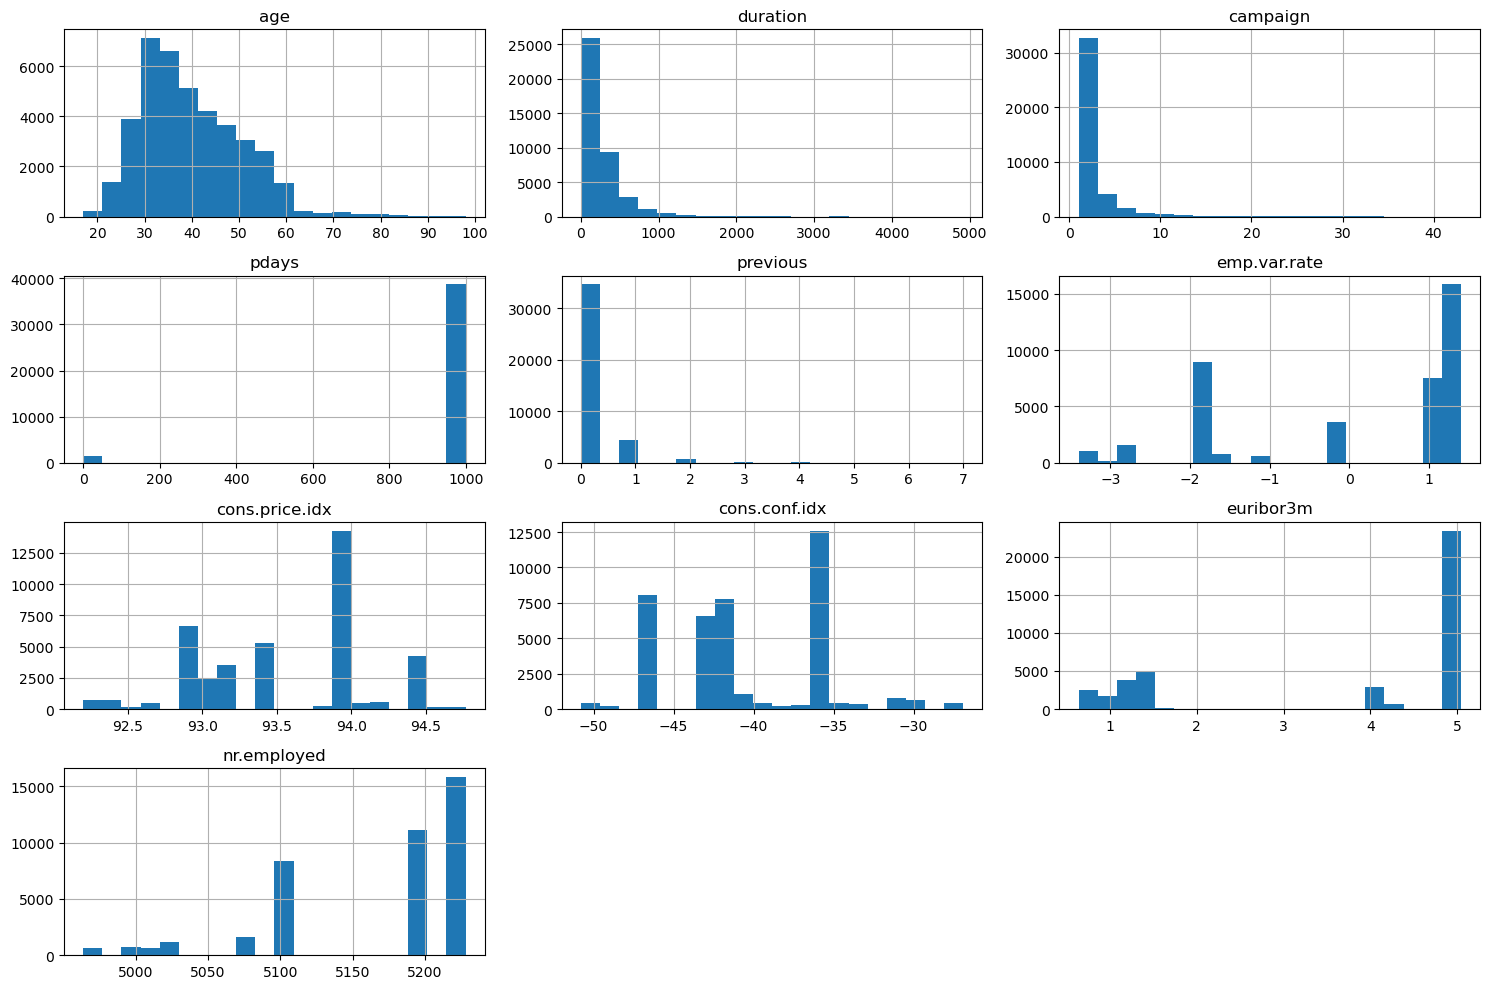

In [57]:
dup_add.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

<Axes: xlabel='job'>

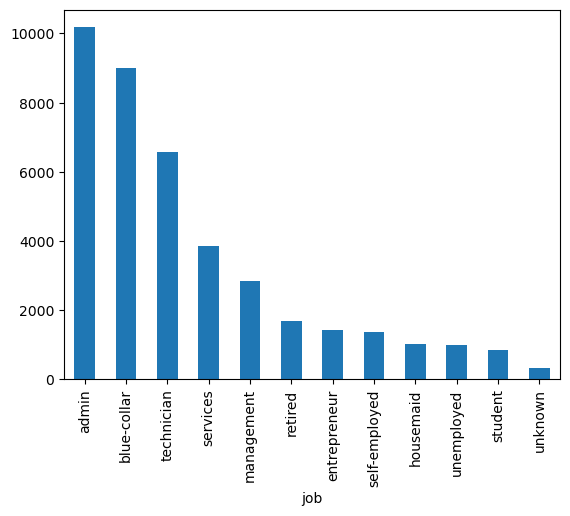

In [58]:
dup_add['job'].value_counts().plot(kind='bar')

<Axes: xlabel='marital'>

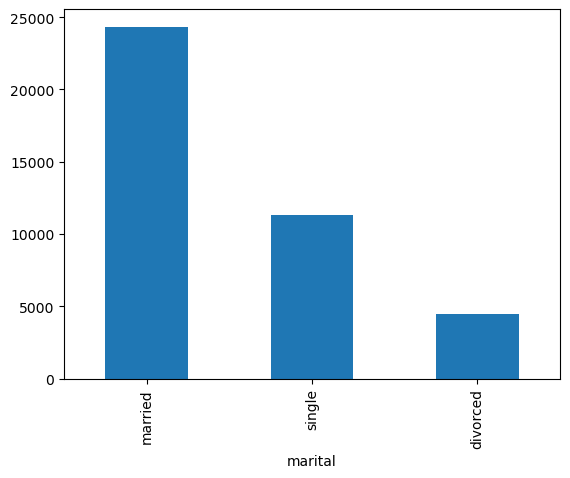

In [59]:
dup_add['marital'].value_counts().plot(kind='bar')

<Axes: xlabel='education'>

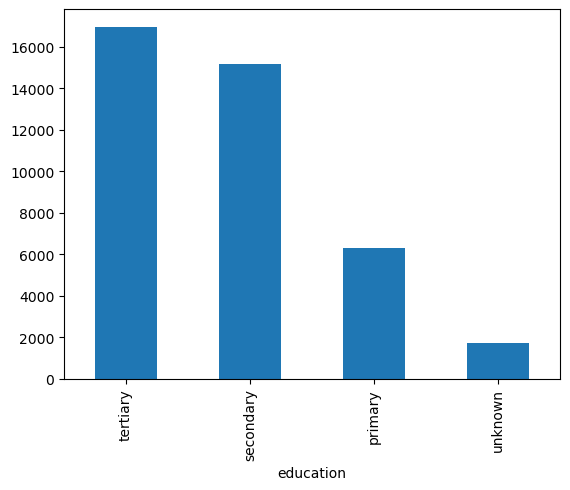

In [60]:
dup_add['education'].value_counts().plot(kind='bar')

<Axes: xlabel='default'>

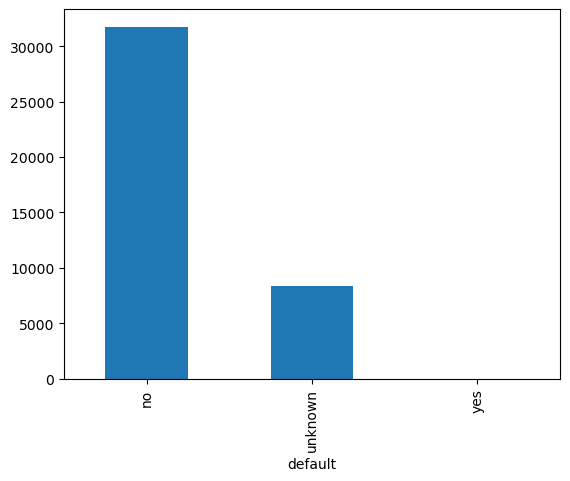

In [61]:
dup_add['default'].value_counts().plot(kind='bar')

<Axes: xlabel='housing'>

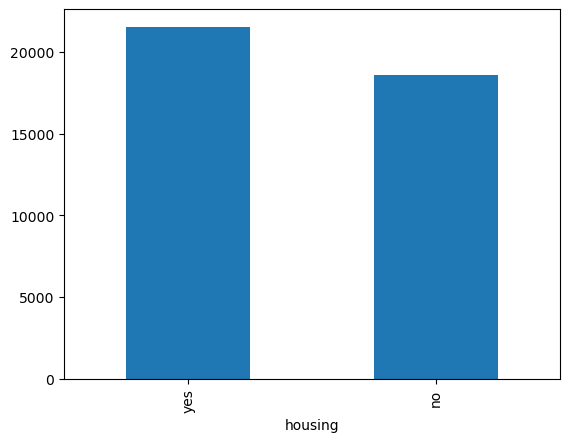

In [62]:
dup_add['housing'].value_counts().plot(kind='bar')

<Axes: xlabel='loan'>

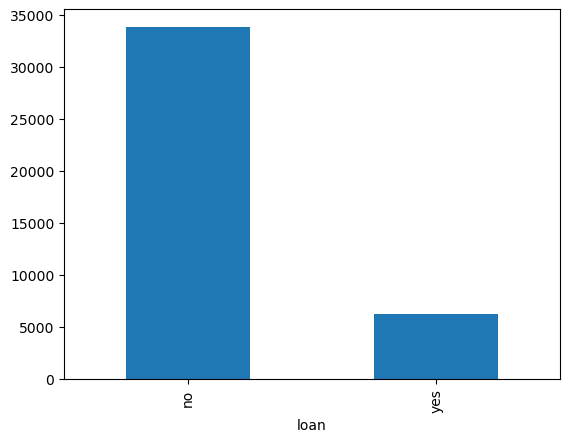

In [63]:
dup_add['loan'].value_counts().plot(kind='bar')

<Axes: xlabel='contact'>

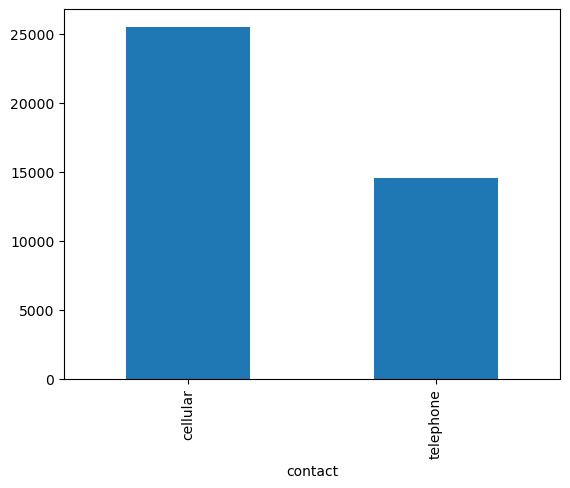

In [64]:
dup_add['contact'].value_counts().plot(kind='bar')

<Axes: xlabel='month'>

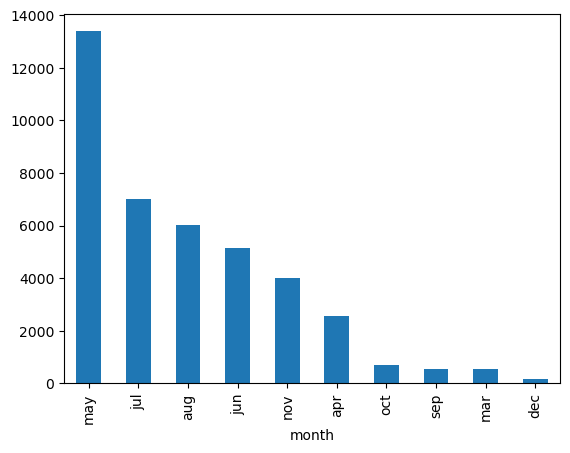

In [65]:
dup_add['month'].value_counts().plot(kind='bar')

<Axes: xlabel='day_of_week'>

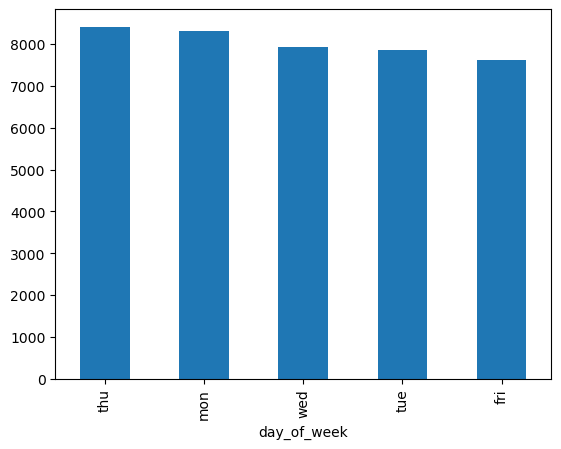

In [66]:
dup_add['day_of_week'].value_counts().plot(kind='bar')

<Axes: xlabel='poutcome'>

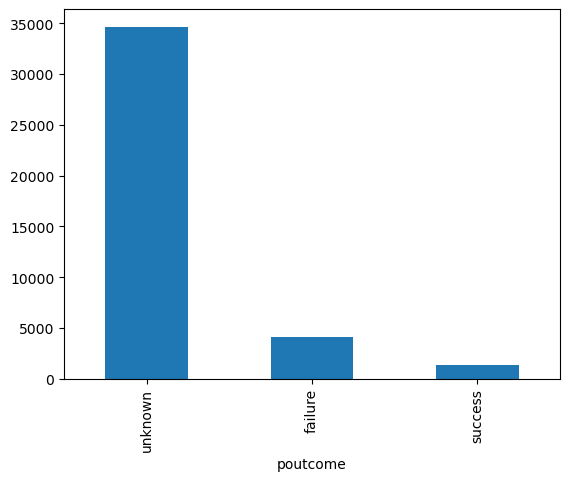

In [67]:
dup_add['poutcome'].value_counts().plot(kind='bar')

### Bivariate Analysis

<Axes: xlabel='y', ylabel='age'>

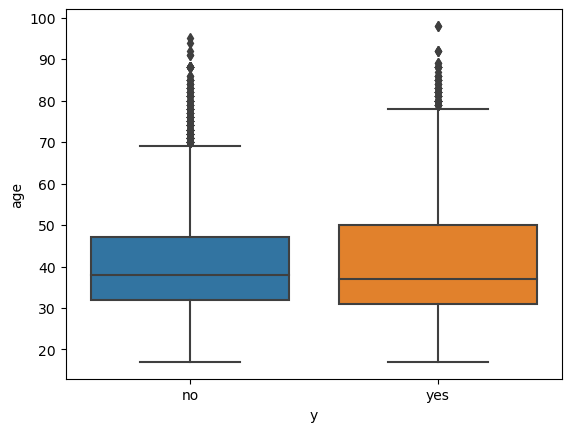

In [69]:
sns.boxplot(data=dup_add, x='y', y='age')  # age vs subscription

<Axes: xlabel='y', ylabel='duration'>

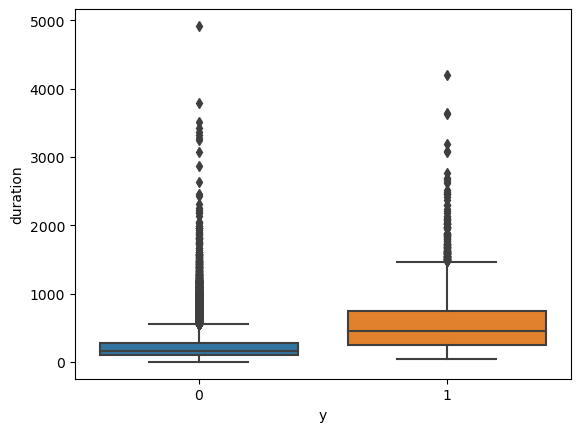

In [78]:
sns.boxplot(data=dup_add, x='y', y='duration')  # Call duration vs subscription

<Axes: xlabel='y', ylabel='campaign'>

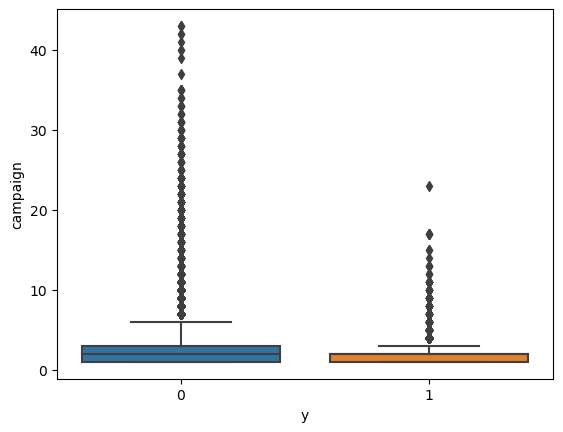

In [79]:
sns.boxplot(data=dup_add, x='y', y='campaign')  # campaign vs subscription

<Axes: xlabel='y', ylabel='pdays'>

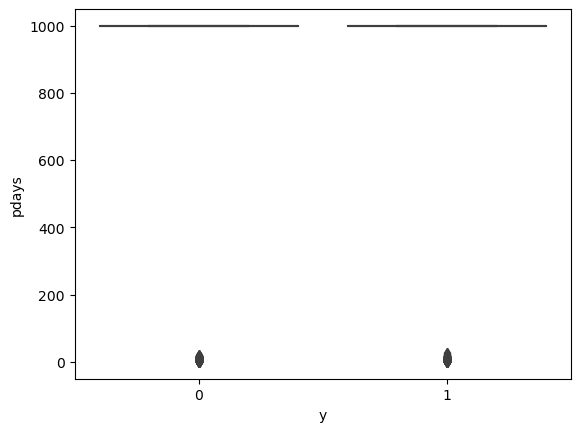

In [80]:
sns.boxplot(data=dup_add, x='y', y='pdays')  # pdays vs subscription

<Axes: xlabel='y', ylabel='previous'>

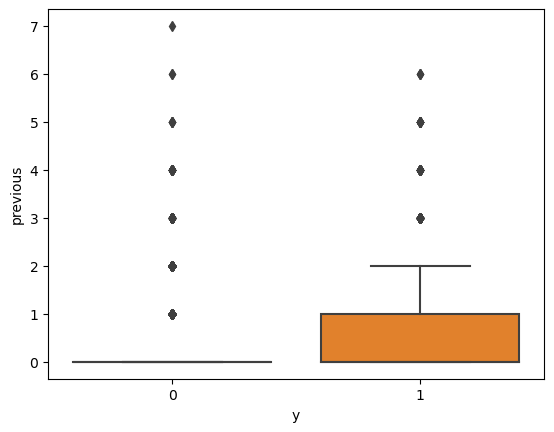

In [81]:
sns.boxplot(data=dup_add, x='y', y='previous')  # previous vs subscription

<Axes: xlabel='y', ylabel='emp.var.rate'>

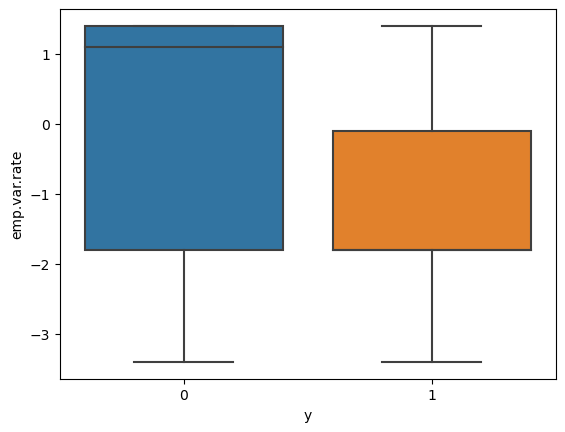

In [82]:
sns.boxplot(data=dup_add, x='y', y='emp.var.rate')  # emp.var.rate vs subscription

<Axes: xlabel='y', ylabel='cons.price.idx'>

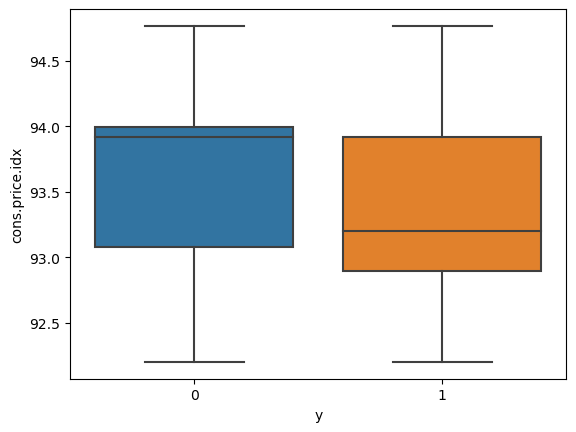

In [83]:
sns.boxplot(data=dup_add, x='y', y='cons.price.idx')  # cons.price.idx vs subscription

<Axes: xlabel='y', ylabel='cons.conf.idx'>

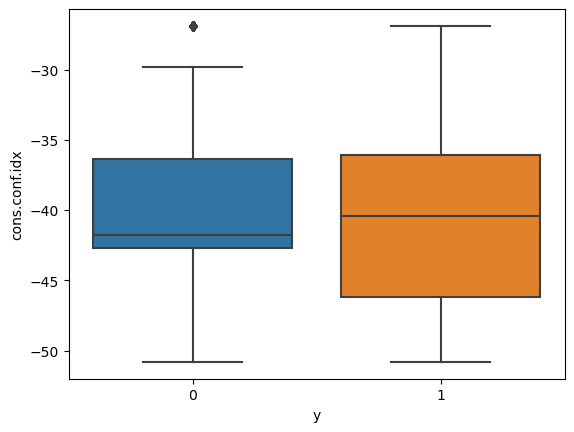

In [84]:
sns.boxplot(data=dup_add, x='y', y='cons.conf.idx')  # cons.conf.idx vs subscription

<Axes: xlabel='y', ylabel='euribor3m'>

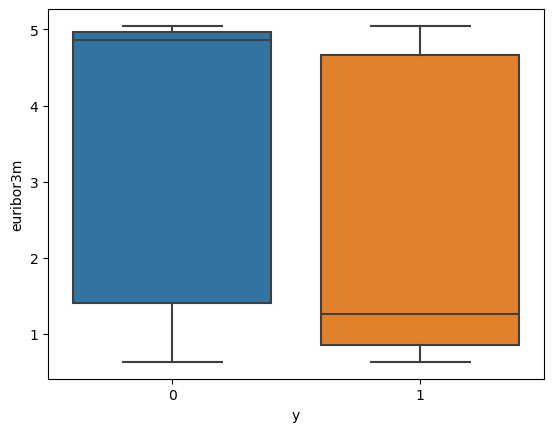

In [85]:
sns.boxplot(data=dup_add, x='y', y='euribor3m')  # euribor3m vs subscription

In [ ]:
sns.boxplot(data=dup_add, x='y', y='nr.employed')  # nr.employed vs subscription

In [ ]:
pd.crosstab(dup_add['job'], dup_add['y']).plot(kind='bar', stacked=True)

In [ ]:
pd.crosstab(dup_add['marital'], dup_add['y']).plot(kind='bar', stacked=True)

In [ ]:
pd.crosstab(dup_add['education'], dup_add['y']).plot(kind='bar', stacked=True)

In [ ]:
pd.crosstab(dup_add['default'], dup_add['y']).plot(kind='bar', stacked=True)

In [ ]:
pd.crosstab(dup_add['housing'], dup_add['y']).plot(kind='bar', stacked=True)

In [ ]:
pd.crosstab(dup_add['loan'], dup_add['y']).plot(kind='bar', stacked=True)

In [ ]:
pd.crosstab(dup_add['contact'], dup_add['y']).plot(kind='bar', stacked=True)

In [ ]:
pd.crosstab(dup_add['month'], dup_add['y']).plot(kind='bar', stacked=True)

In [ ]:
pd.crosstab(dup_add['day_of_week'], dup_add['y']).plot(kind='bar', stacked=True)

In [ ]:
pd.crosstab(dup_add['poutcome'], dup_add['y']).plot(kind='bar', stacked=True)

### Correlation Analysis

<Axes: >

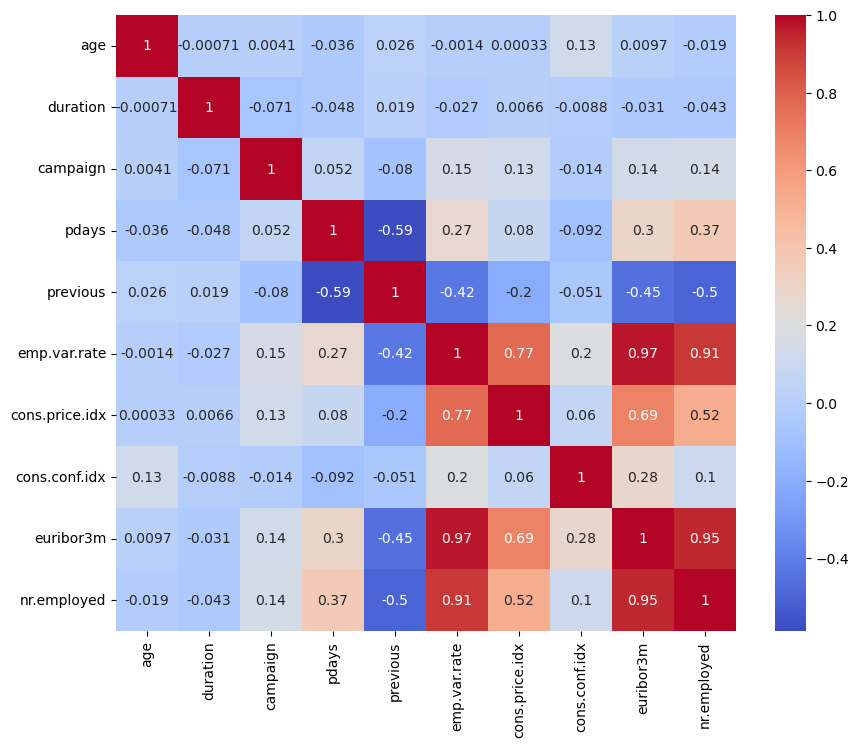

In [70]:
corr = dup_add.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

### Target Variable Balance

<Axes: title={'center': 'Target Distribution'}, xlabel='y'>

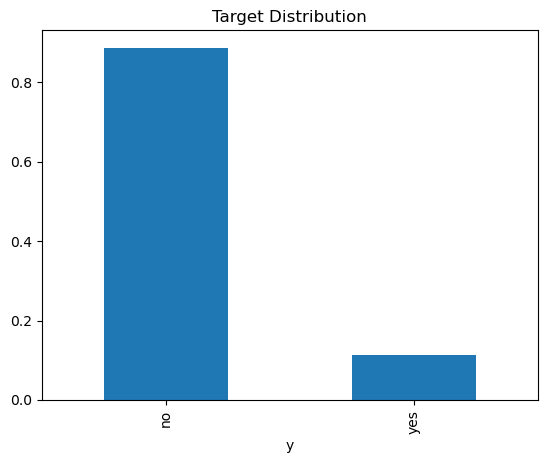

In [71]:
dup_add['y'].value_counts(normalize=True).plot(kind='bar', title='Target Distribution')

#the data is imbalanced, this could cause issues

### Feature Engineering

In [72]:
#label coding categorical values into numerics 
label_encoders = {}

for col in dup_add.columns:
    if dup_add[col].dtype == 'object':
        le = LabelEncoder()
        dup_add[col] = le.fit_transform(dup_add[col].astype(str))
        label_encoders[col] = le

In [73]:
#splitting data into feature and target variables
X = dup_add.drop('y', axis=1)  # 'y' is usually the target column in this dataset
y = dup_add['y']

In [74]:
#training random forest model 
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [75]:
#extracting feature importance

importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

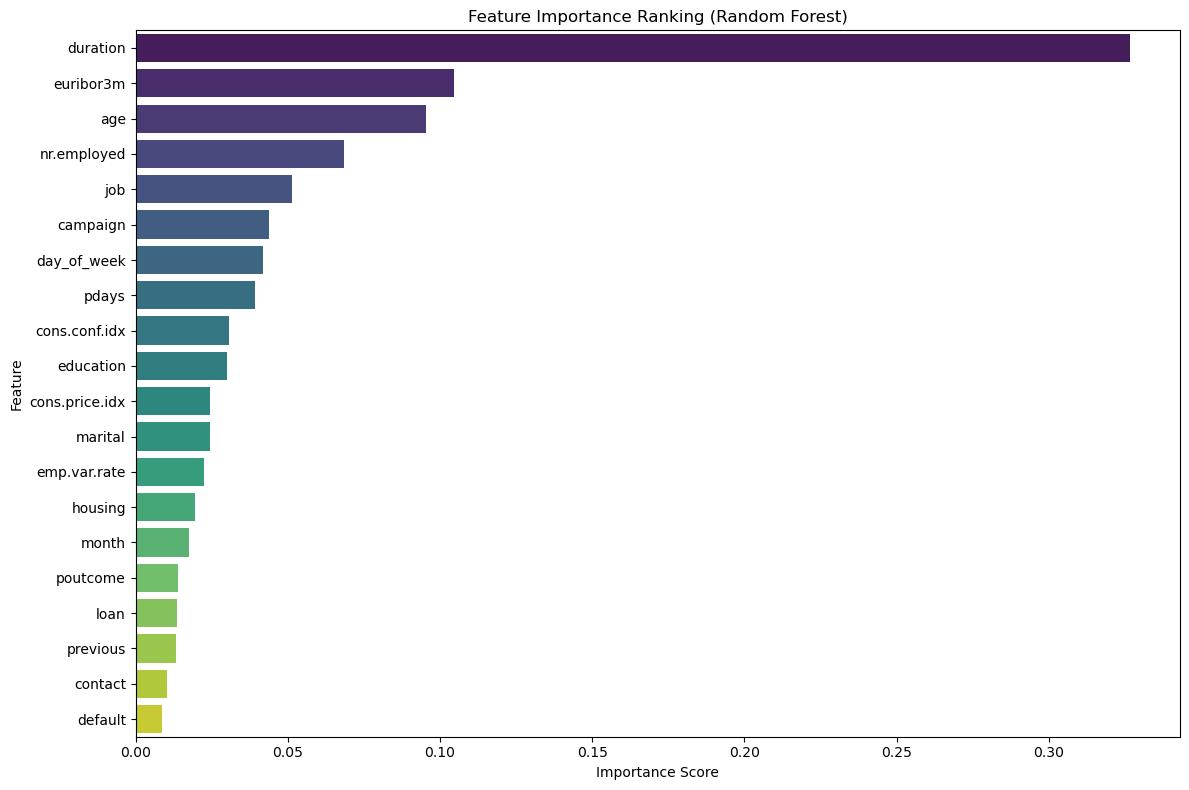

In [76]:
plt.figure(figsize=(12, 8))
sns.barplot(x=importances[indices], y=features[indices], palette='viridis')
plt.title("Feature Importance Ranking (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [ ]:
# I will test if model performance improves when i remove the bottom 3 features in the ranking; default,contact,loan
#in full data set, previous ranks lower than loan

In [77]:
#save cleaned data for deployment
dup_add.to_csv('cleaned_add_full.csv', index=False)

### Model Training

In [86]:
#identify categorical and numeric variables

categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(exclude=['object']).columns.tolist()


In [87]:
#creating pre-processing pipeline

preprocessor = ColumnTransformer(
    transformers=[
       ("num", StandardScaler(), numeric_cols),
       ("cat", OneHotEncoder(handle_unknown="ignore", sparse=False), categorical_cols)
    ],
    remainder="passthrough"  # keep numeric columns as-is
)

### Logistic Regression

In [88]:
#building pipeline

model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
#train model

model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['age', 'job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous',
                                                   'poutcome', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [98]:
#predict
y_pred1 = model_pipeline.predict(X_test)

In [99]:
#check performance
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("Classification Report:\n", classification_report(y_test, y_pred1))

Accuracy: 0.9067796610169492
Confusion Matrix:
 [[6892  203]
 [ 545  384]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7095
           1       0.65      0.41      0.51       929

    accuracy                           0.91      8024
   macro avg       0.79      0.69      0.73      8024
weighted avg       0.90      0.91      0.90      8024



In [ ]:
#Save entire pipeline 
joblib.dump(model_pipeline, "logistic_pipeline.pkl")

### XGBoost

In [93]:
#compute scale pos weight to balances the clasess since "yes" is underrepresented
scale_pos_weight = len(y[y == 0]) / len(y[y == 1])

In [94]:
#xgb pipeline

xgb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", XGBClassifier(
        n_estimators=100,
        max_depth=4,
        learning_rate=0.1,
        use_label_encoder=False,
        eval_metric="logloss",
        scale_pos_weight=scale_pos_weight,
        random_state=42
    ))
])

In [95]:
#train and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
#fit model
xgb_pipeline.fit(X_train, y_train)

C:\Users\COMPUFY\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:20:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['age', 'job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous',
                                                   'poutcome', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('cat',
                                                  OneHotEnc...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [100]:
#prediction
y_pred2 = xgb_pipeline.predict(X_test)

In [102]:
#evaluating xgb performance

print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("Classification Report:\n", classification_report(y_test, y_pred2))

Accuracy: 0.8621635094715853
Confusion Matrix:
 [[6060 1035]
 [  71  858]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.85      0.92      7095
           1       0.45      0.92      0.61       929

    accuracy                           0.86      8024
   macro avg       0.72      0.89      0.76      8024
weighted avg       0.93      0.86      0.88      8024



In [ ]:
#saving model pipeline
joblib.dump(xgb_pipeline, "xgb_pipeline.pkl")

In [ ]:
# i am going with XGBoost, eventhough it has a lower precision rate, 
# I will drop the 3 low ranking features to see if that improves performance

In [103]:
features_to_drop = ['default', 'contact', 'loan']
X1 = dup_add.drop(columns=features_to_drop + ['y'])
y1 = dup_add['y']

In [104]:
# Split the data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y)


In [105]:
# Train the model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X1_train, y1_train)

C:\Users\COMPUFY\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:23:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [106]:
# Predictions
y1_pred = model.predict(X1_test)

In [107]:
print("Accuracy:", accuracy_score(y1_test, y1_pred))
print("Confusion Matrix:\n", confusion_matrix(y1_test, y1_pred))
print("Classification Report:\n", classification_report(y1_test, y1_pred))

Accuracy: 0.918369890329013
Confusion Matrix:
 [[6874  246]
 [ 409  495]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      7120
           1       0.67      0.55      0.60       904

    accuracy                           0.92      8024
   macro avg       0.81      0.76      0.78      8024
weighted avg       0.91      0.92      0.91      8024



### Full Dataset

In [ ]:
#after testing with the sample, i am scaling up using the full data
#do not forget to change data source at top of code and run EDA and cleaning before running this part of code

In [108]:
# making sure time order is covered and assuming time is implied in row order, to avoid data leakage
n_rows = len(dup_add)
split_index = int(n_rows * 0.8)  # Use 80% for training, 20% for testing

train_df = dup_add.iloc[:split_index]
test_df = dup_add.iloc[split_index:]

In [109]:
#feature importance ranking on full data changes features to drop
features_to_drop2 = ['default', 'contact', 'previous']
X2_train = train_df.drop(columns=features_to_drop2 + ['y'])
y2_train = train_df["y"]

In [110]:
X2_test = test_df.drop(columns=features_to_drop2 + ['y'])
y2_test = test_df["y"]

In [111]:
scale_pos_weight = len(y[y == 0]) / len(y[y == 1])

In [112]:
#xgb pipeline

xgb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", XGBClassifier(
        n_estimators=100,
        max_depth=4,
        learning_rate=0.1,
        use_label_encoder=False,
        eval_metric="logloss",
        scale_pos_weight=scale_pos_weight,
        random_state=42
    ))
])

In [114]:
# Train the model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X2_train, y2_train)

C:\Users\COMPUFY\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:25:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [115]:
# Predictions
y2_pred = model.predict(X2_test)

In [116]:
print("Accuracy:", accuracy_score(y2_test, y2_pred))
print("Confusion Matrix:\n", confusion_matrix(y2_test, y2_pred))
print("Classification Report:\n", classification_report(y2_test, y2_pred))

Accuracy: 0.7225822532402791
Confusion Matrix:
 [[5209  348]
 [1878  589]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.94      0.82      5557
           1       0.63      0.24      0.35      2467

    accuracy                           0.72      8024
   macro avg       0.68      0.59      0.59      8024
weighted avg       0.70      0.72      0.68      8024



In [117]:
#tuning prediction threshold to improve model in catching potential subscribers
y_probs = model.predict_proba(X2_test)[:, 1]

# lower threshold to 0.3 from default of 0.5
y2_pred_adjusted = (y_probs >= 0.3).astype(int)


In [118]:
print("Accuracy:", accuracy_score(y2_test, y2_pred_adjusted))
print("Confusion Matrix:\n", confusion_matrix(y2_test, y2_pred_adjusted))
print("Classification Report:\n", classification_report(y2_test, y2_pred_adjusted))

Accuracy: 0.7321784646061814
Confusion Matrix:
 [[5058  499]
 [1650  817]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.91      0.82      5557
           1       0.62      0.33      0.43      2467

    accuracy                           0.73      8024
   macro avg       0.69      0.62      0.63      8024
weighted avg       0.71      0.73      0.70      8024



In [ ]:
#saving final model pipeline
joblib.dump(xgb_pipeline, "xgb_final_pipeline.pkl")